In [1]:
from gensim.models import KeyedVectors
from utilities import url_to_corpus
from itertools import chain
from nltk.corpus import wordnet
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utilities import gen_result_centroids, gen_result_index, plot_metrics, calculate_metrics
import json

cranfield_docs_url = "cranfield/cran_docs.json"
cranfield_queries_url = "cranfield/cran_queries.json"

D,types_docs = url_to_corpus(cranfield_docs_url,'body')
Q,types_queries = url_to_corpus(cranfield_queries_url,'query')

c:\Users\palas\Desktop\NLP\Project\utilities.py:444: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  distances = [cos_sim(query_embedding,centroid) for centroid in centroid_mapping if centroid is not "s"]
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import random

inverted_index = {}

for doc_id, doc in enumerate(D):

    for term in doc:

        if term not in inverted_index:
            inverted_index[term] = []

        if (doc_id+1) not in inverted_index[term] : 
            inverted_index[term].append(doc_id+1)

    for lemma in set(chain.from_iterable([word.lemma_names() for word in wordnet.synsets(term)])):

        if lemma not in inverted_index:
            inverted_index[lemma] = []
        
        if (doc_id+1) not in inverted_index[lemma] : 
            inverted_index[lemma].append(doc_id+1)

# with open("pickel_dictionaries\inverted_index.pkl", "wb") as f:
#     pickle.dump(inverted_index, f)

with open("cranfield/cran_qrels.json", "r") as f:
    data = json.load(f)

q_rel = {}

for result in data:
    
    query_num = result["query_num"]
    position = result["position"]
    doc_id = result["id"]
    
    if query_num not in q_rel:
        q_rel[query_num] = []
    
    q_rel[query_num].append((position, doc_id))
    
for query_num, ranked_docs in q_rel.items():
    ranked_docs.sort()
    q_rel[query_num] = [int(doc_id) for _, doc_id in ranked_docs]
    while(len(q_rel[query_num]) < 1200) : q_rel[query_num].append(0)


c:\Users\palas\Desktop\NLP\Project\utilities.py:436: RuntimeWarning: invalid value encountered in double_scalars
  cosine_sim = dot_product / (norm_a * norm_b)


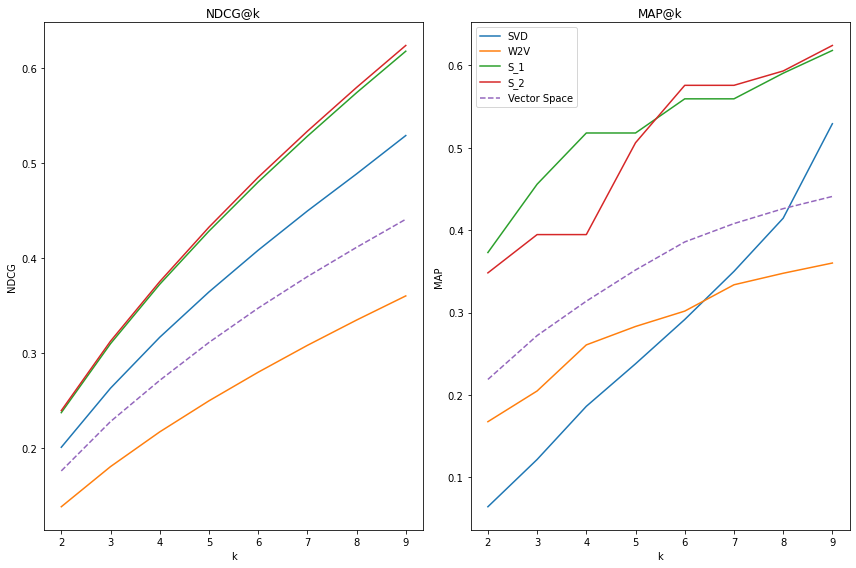

In [3]:
from utilities import plot_centroid_indexing, plot_inverted_indexing

plot_centroid_indexing(q_rel, Q)

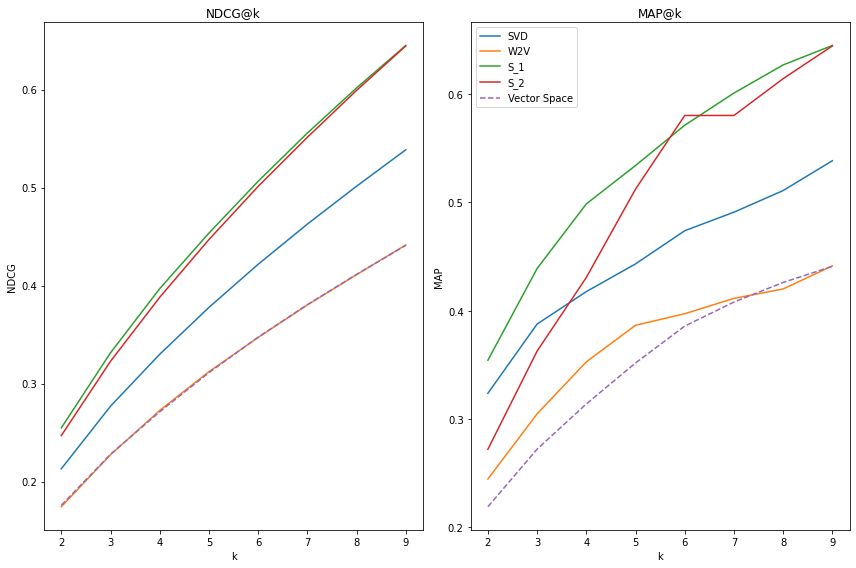

In [4]:
plot_inverted_indexing(q_rel, Q)